# Optimizer Example
MNIST ANN example showing comparison between optimizers.

Richard Henry, 15-Jul-2024 

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# MNIST ANN
Here we compare Adam with optimizers mentioned in the paper.

Adapted from mvsjober on Github.
https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/keras-mnist-mlp.ipynb

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28)
batch_size = 128
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19) 
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(64, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(myClas, 
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, RMSprop

In [7]:
%%time
h0=model_build('rmsprop',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7805 - loss: 0.7088 - val_accuracy: 0.9558 - val_loss: 0.1527
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9332 - loss: 0.2263 - val_accuracy: 0.9678 - val_loss: 0.1102
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9481 - loss: 0.1719 - val_accuracy: 0.9733 - val_loss: 0.0904
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.1435 - val_accuracy: 0.9753 - val_loss: 0.0835
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9634 - loss: 0.1209 - val_accuracy: 0.9783 - val_loss: 0.0794
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.1106 - val_accuracy: 0.9782 - val_loss: 0.0771
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.1023 - val_accuracy: 0.9775 - val_loss: 0.0771
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.0928 - val_accuracy: 0.

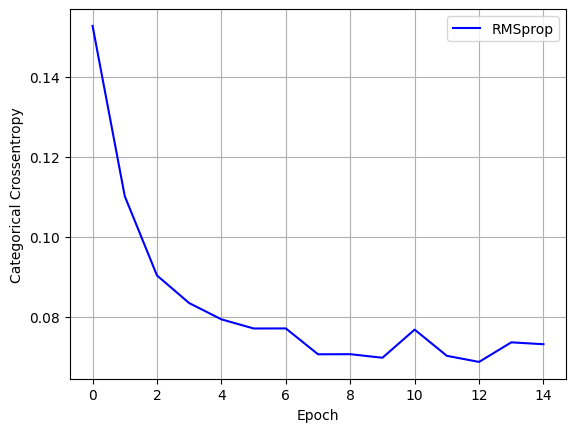

In [8]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop'])
plt.grid()
plt.show()

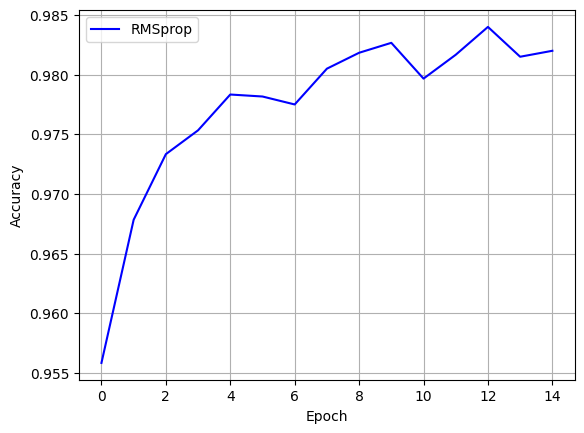

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaGrad

In [10]:
%%time
h1=model_build('adagrad',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1654 - loss: 2.2443 - val_accuracy: 0.5638 - val_loss: 1.8507
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4822 - loss: 1.7952 - val_accuracy: 0.7472 - val_loss: 1.3052
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6177 - loss: 1.3750 - val_accuracy: 0.8215 - val_loss: 0.9372
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6879 - loss: 1.1010 - val_accuracy: 0.8523 - val_loss: 0.7325
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7223 - loss: 0.9420 - val_accuracy: 0.8702 - val_loss: 0.6150
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7518 - loss: 0.8435 - val_accuracy: 0.8808 - val_loss: 0.5403
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7709 - loss: 0.7721 - val_accuracy: 0.8892 - val_loss: 0.4893
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7846 - loss: 0.7171 - val_accuracy: 0.

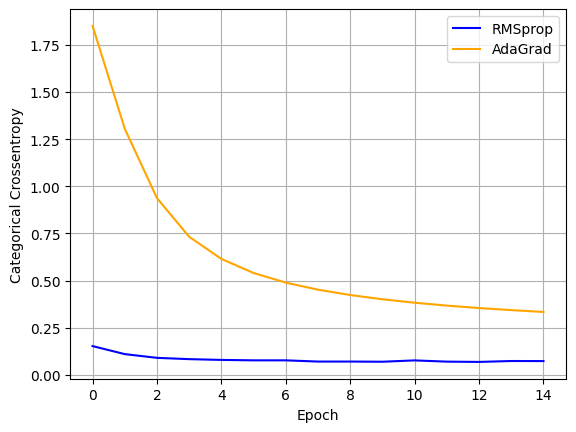

In [11]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad'])
plt.grid()
plt.show()

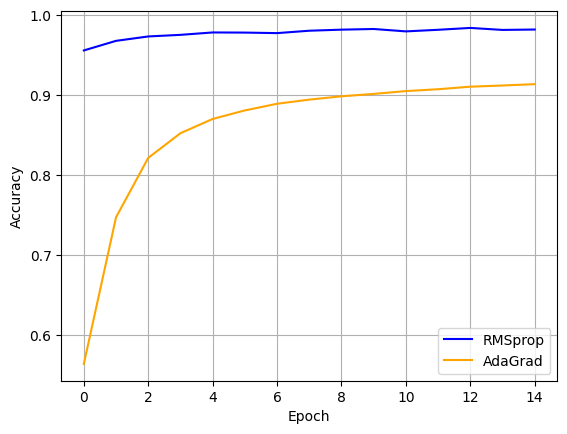

In [12]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, SGD + Nesterov Mommentum

In [13]:
opt012=tf.keras.optimizers.SGD(momentum=0.5,
                               nesterov=True,
                               name='nSGD'
                              )

In [14]:
%%time
h2=model_build(opt012,num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4637 - loss: 1.6386 - val_accuracy: 0.8992 - val_loss: 0.4318
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - loss: 0.6128 - val_accuracy: 0.9185 - val_loss: 0.3041
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.4813 - val_accuracy: 0.9268 - val_loss: 0.2551
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8781 - loss: 0.4137 - val_accuracy: 0.9360 - val_loss: 0.2244
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8890 - loss: 0.3725 - val_accuracy: 0.9417 - val_loss: 0.2022
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8986 - loss: 0.3423 - val_accuracy: 0.9473 - val_loss: 0.1849
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9063 - loss: 0.3181 - val_accuracy: 0.9517 - val_loss: 0.1725
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9134 - loss: 0.2924 - val_accuracy: 0.

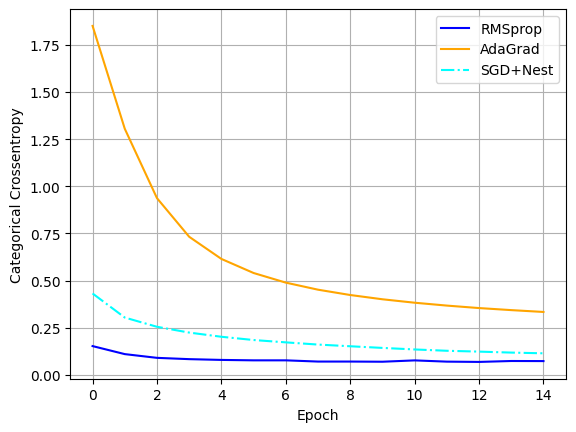

In [15]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest'])
plt.grid()
plt.show()

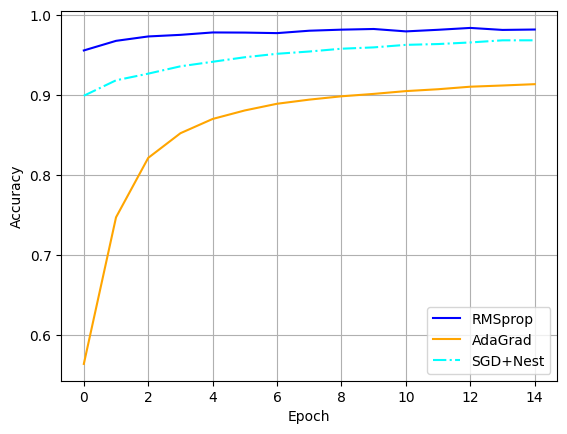

In [16]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'],color='cyan',linestyle='dashdot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### 4th Model, Adam

In [17]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7440 - loss: 0.8197 - val_accuracy: 0.9570 - val_loss: 0.1459
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - loss: 0.2356 - val_accuracy: 0.9687 - val_loss: 0.1048
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9485 - loss: 0.1728 - val_accuracy: 0.9752 - val_loss: 0.0891
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9570 - loss: 0.1431 - val_accuracy: 0.9763 - val_loss: 0.0802
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1201 - val_accuracy: 0.9797 - val_loss: 0.0728
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1072 - val_accuracy: 0.9802 - val_loss: 0.0697
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.0959 - val_accuracy: 0.9810 - val_loss: 0.0686
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9723 - loss: 0.0866 - val_accuracy: 0.

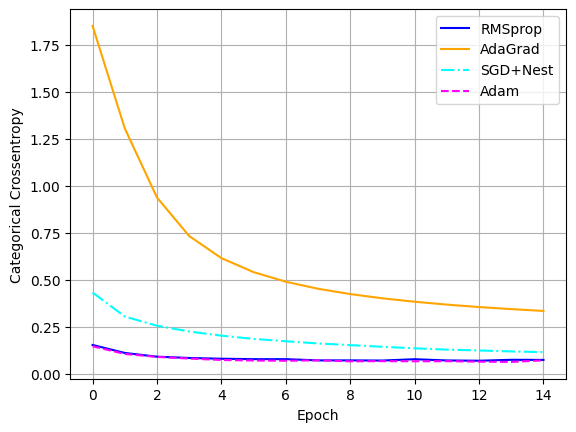

In [18]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

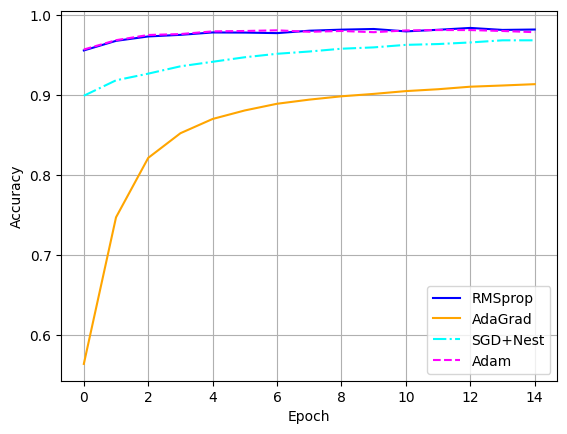

In [19]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

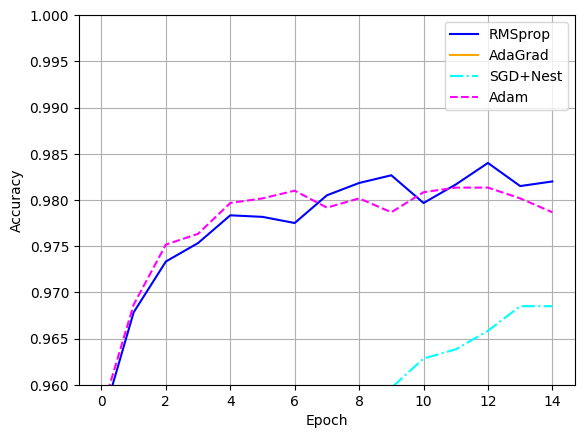

In [20]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.ylim([0.96,1.00])
plt.show()

#### Comment
lorem ipsum
# Conclusions
Blah blah blah